## F-1. Ensemble simulation using different values of a parameter

In [1]:
from hs_restclient import HydroShare
import os, shutil, subprocess
hs = HydroShare()

Username:  choi
Password for choi:  ········


In [2]:
resource_id = 'ea09b74df89242429b1a1026fe7ea28e'
file_path = os.getcwd()

In [3]:
hs.getResource(resource_id, destination=file_path, unzip=True)

In [4]:
# unpack the simulation archive and remove unncessary files
hs_resource_dir = os.path.join(file_path, resource_id, resource_id, 'data/contents/')
hs_resource = os.listdir(hs_resource_dir)
shutil.unpack_archive(hs_resource_dir+hs_resource[0], extract_dir=file_path)
cmd = "rm -rf " + os.path.join(file_path, resource_id)
subprocess.run(cmd, shell=True)

CompletedProcess(args='rm -rf /home/jovyan/ea09b74df89242429b1a1026fe7ea28e', returncode=0)

In [15]:
path = "SummaModel_ReynoldsAspenStand_StomatalResistance/"

In [6]:
!cd {path}; chmod +x install_local_setup.sh; ./install_local_setup.sh

## 1. Import pySUMMA 2.0.0

In [3]:
import pysumma as ps
import numpy as np
import xarray as xr
import os

## 2. Create Simulatioin Object

In [4]:
executable = os.getcwd()+"/summa/bin/summa.exe"
file_manager = 'SummaModel_ReynoldsAspenStand_StomatalResistance/file_manager.txt'

s = ps.Simulation(executable, file_manager)

In [5]:
s.run('local', run_suffix='_default')

In [6]:
print(s.stdout)

file_suffix is '_default'.
file_master is '/home/jovyan/SummaModel_ReynoldsAspenStand_StomatalResistance/.pysumma/_default/file_manager.txt'.
decisions file =  /home/jovyan/SummaModel_ReynoldsAspenStand_StomatalResistance/.pysumma/_default/settings/decisions.txt
   1 simulStart: 2006-07-01 00:00
   2 simulFinsh: 2007-09-30 00:00
   3 tmZoneInfo: localTime
   4 soilCatTbl: ROSETTA
   5 vegeParTbl: USGS
   6 soilStress: NoahType
   7 stomResist: simpleResistance
   8 num_method: itertive
   9 fDerivMeth: analytic
  10 LAI_method: specified
  11 f_Richards: mixdform
  12 groundwatr: noXplict
  13 hc_profile: constant
  14 bcUpprTdyn: nrg_flux
  15 bcLowrTdyn: zeroFlux
  16 bcUpprSoiH: liq_flux
  17 bcLowrSoiH: drainage
  18 veg_traits: CM_QJRMS1988
  19 canopyEmis: difTrans
  20 snowIncept: lightSnow
  21 windPrfile: logBelowCanopy
  22 astability: louisinv
  23 canopySrad: BeersLaw
  24 alb_method: varDecay
  25 compaction: anderson
  26 snowLayers: CLM_2010
  27 thCondSnow: jrdn1991
  2

In [26]:
print(s.stderr)

/bin/sh: 1: /summa/bin/summa.exe: not found



## How to manipulate Param trial

### Show different Parameterizations

In [7]:
from dask.distributed import Client

# Setup a local cluster.
# By default this sets up 1 worker per core
client = Client()
client.cluster

In [8]:
print(s.local_param_info)

upperBoundHead            |      -7.5d-1 |      -1.0d+2 |      -1.0d-2
lowerBoundHead            |       0.0000 |      -1.0d+2 |      -1.0d-2
upperBoundTheta           |       0.2004 |       0.1020 |       0.3680
lowerBoundTheta           |       0.1100 |       0.1020 |       0.3680
upperBoundTemp            |     272.1600 |     270.1600 |     280.1600
lowerBoundTemp            |     274.1600 |     270.1600 |     280.1600
tempCritRain              |     273.1600 |     272.1600 |     274.1600
tempRangeTimestep         |       2.0000 |       0.5000 |       5.0000
frozenPrecipMultip        |       1.0000 |       0.5000 |       1.5000
snowfrz_scale             |      50.0000 |      10.0000 |    1000.0000
fixedThermalCond_snow     |       0.3500 |       0.1000 |       1.0000
albedoMax                 |       0.8400 |       0.7000 |       0.9500
albedoMinWinter           |       0.5500 |       0.6000 |       1.0000
albedoMinSpring           |       0.5500 |       0.3000 |       1.0000
albedo

In [9]:
decay_rates = {'albedoDecayRate': np.array([1.0e+5, 5.0e+5, 1.0e+6, 5.0e+6])}
config = ps.ensemble.parameter_product(decay_rates)
param_ens = ps.Ensemble(executable, config, file_manager, num_workers=4)

In [10]:
param_ens = ps.Ensemble(executable, config, file_manager, num_workers=4)

In [13]:
param_ens.run('local')

In [ ]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:44631")
client

In [ ]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:44631")
client

In [ ]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:44631")
client

In [12]:
param_ens.summary()

{'success': ['++albedoDecayRate=100000.0++',
  '++albedoDecayRate=500000.0++',
  '++albedoDecayRate=1000000.0++',
  '++albedoDecayRate=5000000.0++'],
 'error': [],
 'other': []}

In [16]:
param_ens.rerun_failed('local')

In [14]:
output = param_ens.merge_output()
output

/srv/conda/envs/notebook/lib/python3.8/site-packages/pysumma/ensemble.py:125: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  full = xr.open_mfdataset(out_file_paths, concat_dim='run_number')
/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/backends/api.py:934: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  combined = auto_combi

<xarray.Dataset>
Dimensions:                    (albedoDecayRate: 4, gru: 1, hru: 1, ifcToto: 14, midToto: 13, time: 10945)
Coordinates:
  * time                       (time) datetime64[ns] 2006-07-01 ... 2007-09-30
  * hru                        (hru) int32 1
  * albedoDecayRate            (albedoDecayRate) float64 1e+05 5e+05 1e+06 5e+06
Dimensions without coordinates: gru, ifcToto, midToto
Data variables:
    pptrate                    (time, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    airtemp                    (time, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    SWRadAtm                   (time, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    LWRadAtm                   (time, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    averageInstantRunoff       (time, gru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    averageRoutedRunoff        (time, gru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    scalarCanopyIce            (time, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    scalarCanopyLiq            (time, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    scalarCanairTemp           (time, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    scalarCanopyTemp           (time, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    scalarSnowDepth            (time, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    scalarSWE                  (time, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    mLayerTemp                 (time, midToto, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 13, 1, 1), meta=np.ndarray>
    scalarSurfaceTemp          (time, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    mLayerDepth                (time, midToto, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 13, 1, 1), meta=np.ndarray>
    mLayerHeight               (time, midToto, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 13, 1, 1), meta=np.ndarray>
    iLayerHeight               (time, ifcToto, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 14, 1, 1), meta=np.ndarray>
    scalarTotalSoilLiq         (time, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    scalarTotalSoilIce         (time, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    scalarCanairNetNrgFlux     (time, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    scalarCanopyNetNrgFlux     (time, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    scalarGroundNetNrgFlux     (time, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    scalarLWNetUbound          (time, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    scalarSenHeatTotal         (time, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    scalarLatHeatTotal         (time, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    scalarLatHeatCanopyEvap    (time, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    scalarLatHeatCanopyTrans   (time, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    scalarLatHeatGround        (time, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    scalarCanopySublimation    (time, hru, albedoDecayRate) float64 dask.array<chunksize=(10945, 1, 1), meta=np.ndarray>
    scalarSnowSublimation  

In [15]:
len(output['albedoDecayRate'])

4

In [16]:
keys=[]
for key in config.keys():
    keys.append(key)

In [17]:
keys

['++albedoDecayRate=100000.0++',
 '++albedoDecayRate=500000.0++',
 '++albedoDecayRate=1000000.0++',
 '++albedoDecayRate=5000000.0++']

In [18]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
sim_start_date = s.decisions['simulStart'].value[0:10]
sim_end_date = s.decisions['simulFinsh'].value[0:10]
graph_start_date = s.decisions['simulStart'].value[0:10]
graph_end_date = s.decisions['simulFinsh'].value[0:10]
arr = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
H_index = pd.date_range(sim_start_date, sim_end_date, freq='1H')
total_et_f = pd.DataFrame(index=arr)

In [21]:
# set output variable we want
output_variables = ['scalarCanopyTranspiration','scalarCanopyEvaporation','scalarGroundEvaporation']
# check output directory
output_path = s.manager["output_path"].value
# check SUMMA output file 
run_suffix = 'different_decisions'

In [22]:
for i in range(len(output['albedoDecayRate'])):
    total_et_data = (output["scalarCanopyTranspiration"][:,:,i].values + output["scalarCanopyEvaporation"][:,:,i].values + output["scalarGroundEvaporation"][:,:,i].values)*3600*1.2
    df = pd.DataFrame(total_et_data, index=H_index)
    df.index = df.index.round("H")
    df = df.loc[graph_start_date:graph_end_date]
    df_hourly = df.resample("H").mean()
    total_et_hourly = df_hourly.groupby(df_hourly.index.hour).mean()
    total_et_f[keys[i]] = total_et_hourly
total_et_f.head()

,++albedoDecayRate=100000.0++,++albedoDecayRate=500000.0++,++albedoDecayRate=1000000.0++,++albedoDecayRate=5000000.0++
0,-0.026491,-0.026587,-0.027022,-0.027663
1,-0.025762,-0.025920,-0.026450,-0.027466
2,-0.025978,-0.026139,-0.026648,-0.027169
3,-0.024972,-0.025243,-0.025720,-0.026859
4,-0.023304,-0.023650,-0.024011,-0.025012


In [23]:
# create observation data object
Val_eddyFlux = xr.open_dataset('ReynoldsCreek_eddyFlux.nc')
# read Total Evapotranspiration(LE-wpl) from validation netcdf file
Obs_Evapotranspitaton = Val_eddyFlux.variables['LE-wpl']
# create dates(X-axis) attribute from validation netcdf file
dates = Val_eddyFlux.coords['time'].data
# Change unit from Wm-2 to mm/hr (1 Wm-2 = 0.0864 MJm-2day-1, 1 MJm-2day-1 = 0.408 mmday-1, 1day = 24h)
data_values = Obs_Evapotranspitaton.data/2260000*3600*1.4   #*0.0864*0.408/24
# create two dimensional tabular data structure 
df = pd.DataFrame(data_values, index=dates)
# set the time period to display plot
df_filt = df.loc[graph_start_date:graph_end_date]
# select aspen obervation station among three different stations
df_filt.columns = ['-','Observation (aspen)','-']
# resample data by the average for hour of day
df_gp_hr = df_filt.groupby([df_filt.index.hour, df_filt.index.minute]).mean()
# reset index so each row has an hour an minute column
df_gp_hr.reset_index(inplace=True)
# add hour and minute columns for plotting
xvals = df_gp_hr.reset_index()['level_0'] + df_gp_hr.reset_index()['level_1']/60.

FileNotFoundError: [Errno 2] No such file or directory: b'/home/jovyan/ReynoldsCreek_eddyFlux.nc'

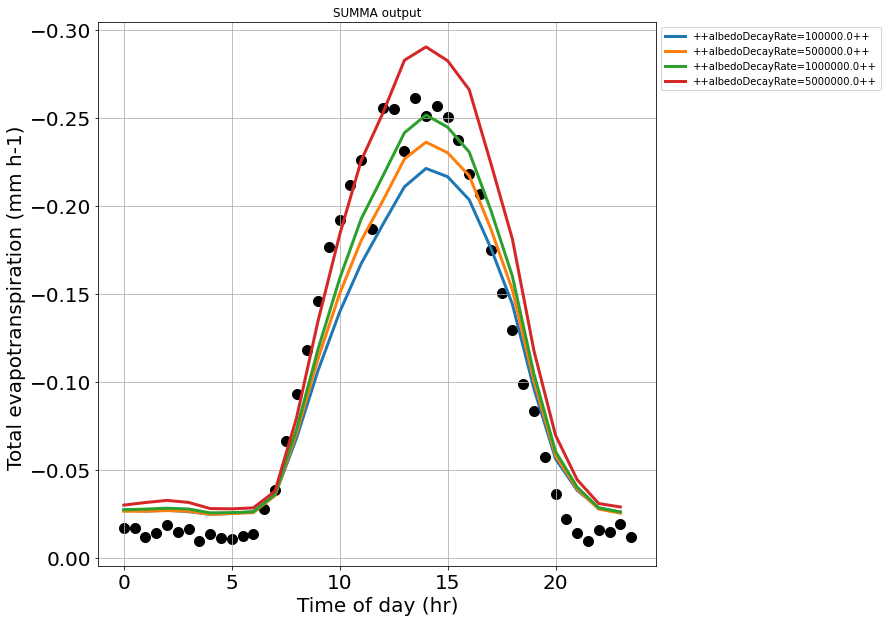

In [62]:
ax = total_et_f.plot(figsize=(10,10),linewidth=3.0)
ax.invert_yaxis()
ax.set_title("SUMMA output")
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)
ax.scatter(xvals, df_gp_hr['Observation (aspen)'], color='black', s=100)
# add x, y label
ax.set_xlabel('Time of day (hr)', fontsize=20)
ax.set_ylabel('Total evapotranspiration (mm h-1) ', fontsize=20)
# show up the legend
#ax.legend(fontsize=17)
ax.tick_params(labelsize = 20)
ax.grid('on')
plt.show()